<a href="https://colab.research.google.com/github/AdiRagil/machine/blob/main/UTS2_G.231.21.0023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# untuk mengimpor pustaka (library)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# untuk menguploaded file dataset nya
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [32]:
# untuk mengimpor pustaka (library)
import pandas as pd
# digunakan untuk membaca dataset yang ada di library
df = pd.read_csv('CarPrice_Assignment.csv')
# digunakan untuk menampilkan dataset 5 teratas
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
# untuk mengubah tipe data semua kolom dalam DataFrame 'df' menjadi tipe data string
df = df.astype(str)

In [34]:
# digunakan untuk memberikan informasi ringkas tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_ID            205 non-null    object
 1   symboling         205 non-null    object
 2   CarName           205 non-null    object
 3   fueltype          205 non-null    object
 4   aspiration        205 non-null    object
 5   doornumber        205 non-null    object
 6   carbody           205 non-null    object
 7   drivewheel        205 non-null    object
 8   enginelocation    205 non-null    object
 9   wheelbase         205 non-null    object
 10  carlength         205 non-null    object
 11  carwidth          205 non-null    object
 12  carheight         205 non-null    object
 13  curbweight        205 non-null    object
 14  enginetype        205 non-null    object
 15  cylindernumber    205 non-null    object
 16  enginesize        205 non-null    object
 17  fuelsystem      

In [35]:
# Mengecek apakah ada deret yang kosong
df.empty

False

In [36]:
# Melihat ukuran dari data
df.size

5330

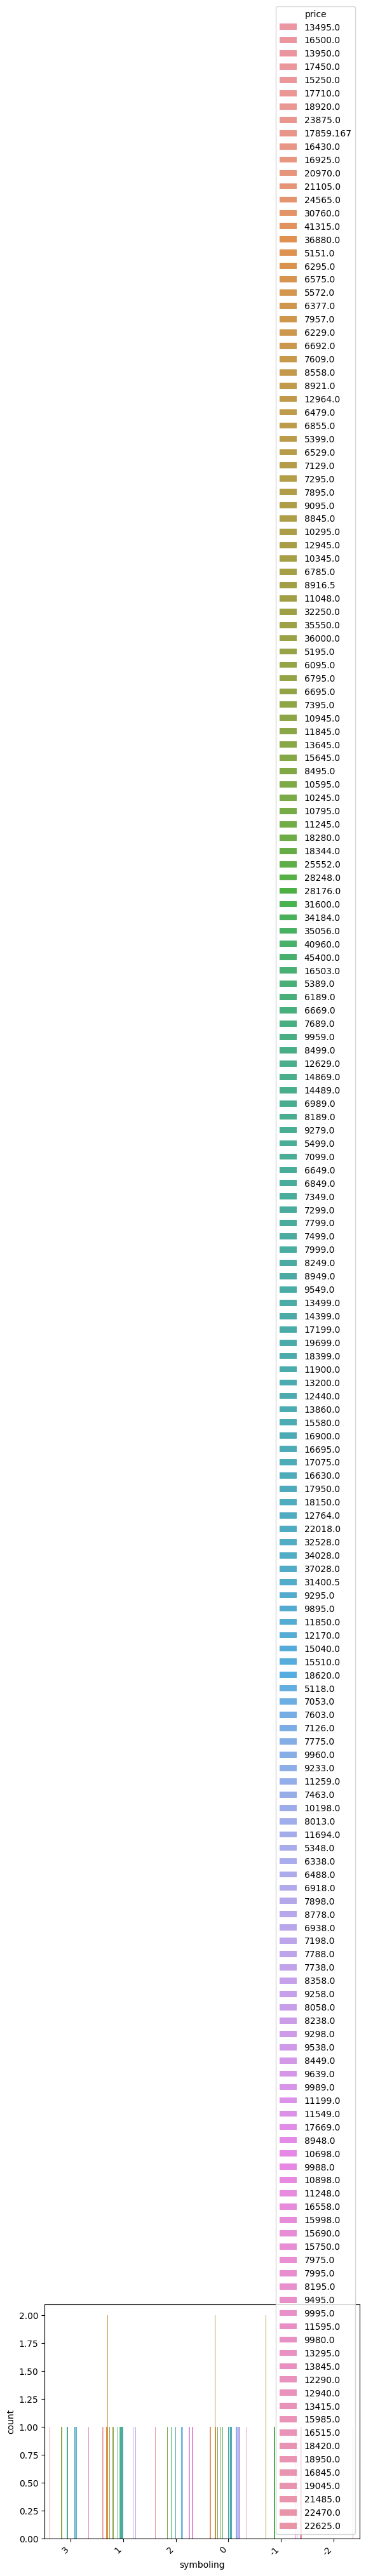

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='symboling',hue='price') # untuk membuat diagram batang yang menghitung jumlah pengamatan dalam setiap kategori pada sumbu x dan membaginya berdasarkan kategori pada sumbu hue
plt.xticks(rotation=45, ha='right'); # untuk mengatur penanda atau label pada sumbu x

In [45]:
# untuk melakukan one-hot encoding pada kolom 'symboling' dalam DataFrame 'df'
pre_df = pd.get_dummies(df,columns=['symboling'],drop_first=True)
# digunakan untuk menampilkan dataset 5 teratas
pre_df.head()

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,0,0,0,0,1
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,0,0,0,0,1
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,0,0,1,0,0
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,0,0,0,1,0
4,5,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,0,0,0,1,0


In [46]:
# untuk mengimport model dari selection ke train_test
from sklearn.model_selection import train_test_split

# untuk membuat variabel X yang berisi fitur-fitur dari DataFrame pre_df kecuali kolom 'price'
X = pre_df.drop('price', axis=1)
# untuk membuat variabel y yang berisi kolom 'price' dari DataFrame pre_df
y = pre_df['price']

# untuk membagi dataset menjadi dua bagian
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [47]:
# untuk mengkodekan label kategori dalam setiap kolom DataFrame df menjadi nilai numerik
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [48]:
# untuk membuat variabel X yang berisi fitur-fitur dari DataFrame df kecuali kolom 'price'
X = df.drop('price', axis=1)
# untuk membuat variabel y yang berisi kolom 'price' dari DataFrame df
y = df['price']

In [49]:
# untuk membagi dataset menjadi dua bagian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)  # untuk menggunakan model K-Nearest Neighbors (KNN) pada dataset.
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
# untuk melakukan prediksi dengan menggunakan model K-Nearest Neighbors (KNN) yang telah dilatih pada dataset latih
y_pred = knn.predict(X_test)

In [52]:
# untuk melakukan prediksi dengan menggunakan model K-Nearest Neighbors (KNN) yang telah dilatih pada dataset uji (X_test)
predictions = knn.predict(X_test)
# untuk mencetak hasil prediksi dari model ke konsol atau output.
print(predictions)

[ 37  31 143  20  72 120 131 129 133 128  47 129  26   5  89 105 109 175
   1 133   1  32 120 109 109  76  10  47 120  47  72 102 114  47  17  82
  16   3 104 175 131]


In [53]:
# untuk mencetak matriks kebingungan (confusion matrix) ke konsol atau output.
print(confusion_matrix(y_test, y_pred))
# untuk mencetak laporan klasifikasi ke konsol atau output.
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          30   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [54]:
# untuk mengimpor pustaka NumPy ke dalam skrip atau program Python.
import numpy as np
# untuk mengimpor kelas Counter dari modul collections di Python.
from collections import Counter

# Kode ini mendefinisikan suatu fungsi bernama euclidean_distance yang menghitung jarak Euclidean antara dua vektor atau array menggunakan formula Euclidean Distance.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# mendefinisikan suatu kelas yang disebut KNN
class KNN:

    # untuk membaca data dari file CSV dan memuatnya ke dalam objek DataFrame menggunakan pustaka pandas di Python.
    df = pd.read_csv('CarPrice_Assignment.csv')

    # Metode khusus ini disebut konstruktor, dan itu akan dijalankan secara otomatis ketika objek dari kelas tersebut dibuat.
    def __init__(self, k=3):
        self.k = k

    # digunakan dalam konteks pembelajaran mesin untuk melatih atau "fit" model pada data latih.
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # digunakan untuk melakukan prediksi menggunakan model yang telah dilatih, dan self adalah parameter yang merujuk pada objek yang sedang dibuat.
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    # untuk melakukan prediksi pada satu baris data, dan self adalah parameter yang merujuk pada objek yang sedang dibuat.
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    # Menampilkan hasil
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [55]:
# Contoh penggunaan algoritma k-NN
# Buat instance dari kelas KNN dengan nilai k=3
knn = KNN(k=3)
# Membaca dataset csv
df = pd.read_csv('CarPrice_Assignment.csv')

# Contoh data training
X_train = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
y_train = np.array(['red', 'red', 'blue', 'blue', 'red', 'blue'])

# Contoh data testing
X_test = np.array([[2, 2], [6, 9], [0, 0]])

# Melakukan fitting data training ke dalam model
knn.fit(X_train, y_train)

# Melakukan prediksi terhadap data testing
y_pred = knn.predict(X_test)

# Menampilkan hasil
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1